<a href="https://colab.research.google.com/github/harikrish2727/kaggle-titanic-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from xgboost import XGBClassifier

**Import Dataset**

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train = df_train.copy()

In [ ]:
train = train.drop("Survived",axis=1)

In [ ]:
test = df_test.copy()

In [ ]:
df = pd.concat([train,test],axis=0,ignore_index=True)

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**data mining and analysis**

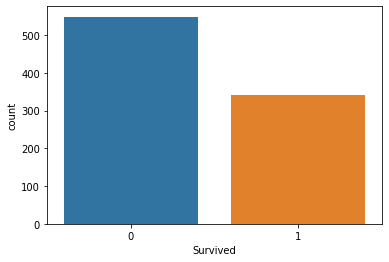

In [ ]:
sns.countplot(df_train["Survived"])
plt.show()

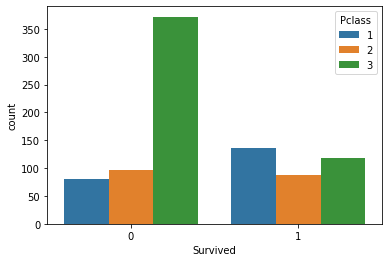

In [ ]:
sns.countplot(df_train["Survived"],hue=df_train["Pclass"])

**people in passenger classs 3 are less survived compared to class 1 and 2**

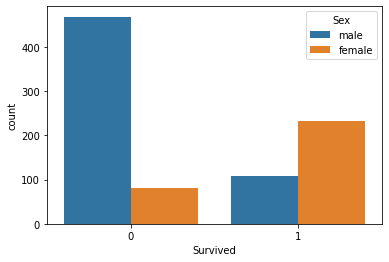

In [ ]:
sns.countplot(df_train["Survived"],hue=df_train["Sex"])

**more women survived than men, obviosly more men died**

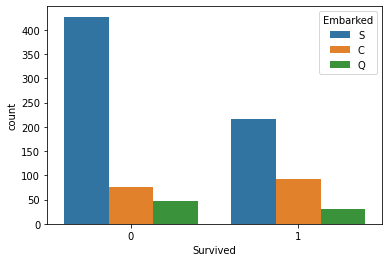

In [ ]:
sns.countplot(df_train["Survived"],hue=df_train["Embarked"])

**most of the passengers boarded the ship from southampton,while people boarded from cherbourg survived more compared to total propotion of people boarded the ship from southampton. So people boared the ship from southampton mostly women and children and also travelled in class 1**

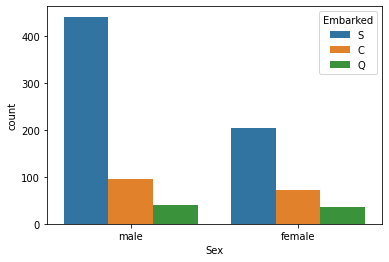

In [ ]:
sns.countplot(x=df_train["Sex"],hue=df_train["Embarked"])

**most of the men boarded the ship from southampton**

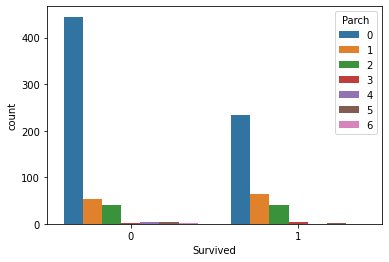

In [ ]:
sns.countplot(df_train["Survived"],hue=df_train["Parch"])

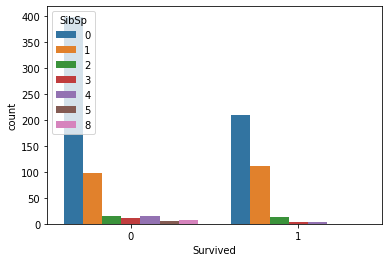

In [ ]:
sns.countplot(df_train["Survived"],hue=df_train["SibSp"])

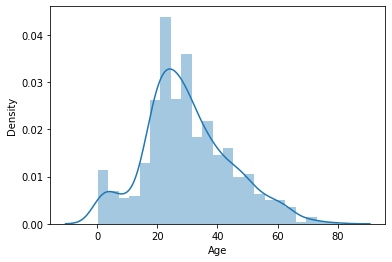

In [ ]:
sns.distplot(df["Age"])

In [ ]:
df["Age"].mean()

29.881137667304014

In [ ]:
df["Age"].median()

28.0

In [ ]:
df_train.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [ ]:
df_train.groupby("Sex")["Survived"].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


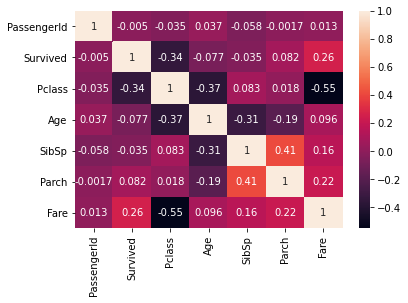

In [ ]:
sns.heatmap(df_train.corr(),annot=True)

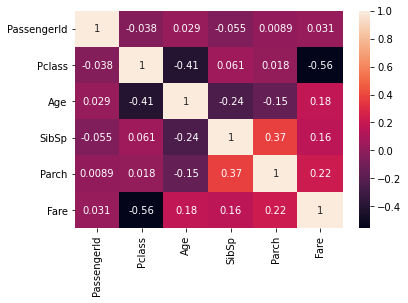

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
name = []
for names in df["Name"]:
  name.append(names.split(",")[1].split(".")[0])

In [ ]:
df["Name"] = name


In [ ]:
for i in range(len(df["Name"])):
  df["Name"][i] = df["Name"][i].strip()
  

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df["Name"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
Mme               1
Dona              1
the Countess      1
Jonkheer          1
Lady              1
Sir               1
Capt              1
Name: Name, dtype: int64

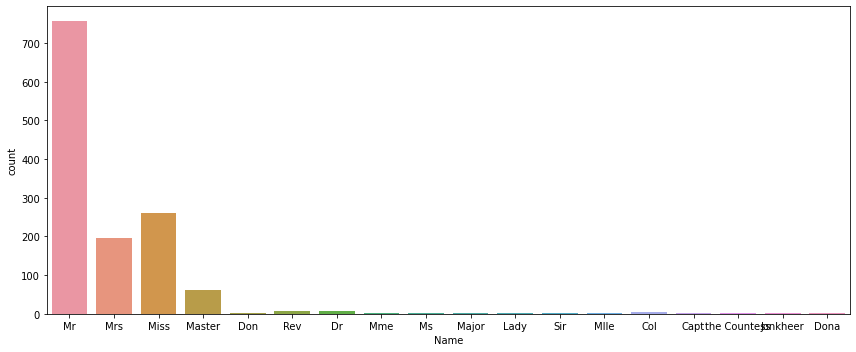

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df["Name"])
plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(df["Name"])):
  if df["Name"][i]=="Mr":
   df["Name"][i]=0
  elif df["Name"][i]=="Mrs":
    df["Name"][i]=1
  elif df["Name"][i]=="Master":
    df["Name"][i]=2
  elif df["Name"][i]=="Miss":
    df["Name"][i]=3
  else:
    df["Name"][i]=4

In [ ]:
df["Name"]

0       0
1       1
2       3
3       1
4       0
       ..
1304    0
1305    4
1306    0
1307    0
1308    2
Name: Name, Length: 1309, dtype: object

In [ ]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,0,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(["PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,3,0,male,35.0,0,0,8.0500,S


In [ ]:
df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df["Name"] = pd.to_numeric(df["Name"])

In [ ]:
df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [ ]:

encoder = LabelEncoder()

In [ ]:
df["Sex"] = encoder.fit_transform(df["Sex"])

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,3,0,1,35.0,0,0,8.0500,S


In [ ]:
df["Embarked"] = df["Embarked"].map({"S":0,"C":1,"Q":2})

In [ ]:
#df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,3,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,3,0,1,35.0,0,0,8.0500,0.0


In [ ]:
df.dtypes

Pclass        int64
Name          int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [ ]:
df.var()

Pclass         0.701969
Name           1.651236
Sex            0.229438
Age          207.748787
SibSp          1.085052
Parch          0.749195
Fare        2678.959738
Embarked       0.427477
dtype: float64

In [ ]:
np.log(df["Age"].min())

-1.7719568419318752

In [ ]:
df["Age"] = np.log(df["Age"])

In [ ]:
np.log(df["Fare"].min())

-inf

In [ ]:
df["Fare"].mean()

33.2954792813456

In [ ]:
df["Fare"] = df["Fare"].replace(0,1)

In [ ]:
df["Fare"] = np.log(df["Fare"])

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,3.091042,1,0,1.981001,0.0
1,1,1,0,3.637586,1,0,4.266662,1.0
2,3,3,0,3.258097,0,0,2.070022,0.0
3,1,1,0,3.555348,1,0,3.972177,0.0
4,3,0,1,3.555348,0,0,2.085672,0.0


In [ ]:
df.var()

Pclass      0.701969
Name        1.651236
Sex         0.229438
Age         0.610872
SibSp       1.085052
Parch       0.749195
Fare        1.008515
Embarked    0.427477
dtype: float64

In [ ]:
imputer = KNNImputer(missing_values=np.nan,n_neighbors=10)
df = imputer.fit_transform(df)

In [ ]:
X_train = df[:891]
X_test = df[891:]

In [ ]:
y_train = df_train["Survived"].values

In [ ]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

**Model creation**

**Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=17,n_jobs=-1)

In [ ]:
param = {"n_estimators":[10,25,50,75,100],"criterion":["gini","entropy"],"max_depth":[2,3,4,5],"min_samples_split":[1,2,4,8],"max_features":["auto", "sqrt", "log2"]}

In [ ]:
forest_grid = GridSearchCV(estimator=rf,param_grid=param,cv=10,n_jobs=-1)

In [ ]:
forest_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                   

In [ ]:
forest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
forest_grid.best_score_

0.8350062421972535

In [ ]:
classifier = forest_grid.best_estimator_

In [ ]:
y_train_pred = classifier.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[503,  46],
       [ 89, 253]])

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8484848484848485

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
submission = pd.read_csv("gender_submission (1).csv",index_col=["PassengerId"])

In [ ]:
subm = submission.copy()

In [ ]:
subm.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [ ]:
subm["Survived"] = y_pred

In [ ]:
subm.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [ ]:
submission.to_csv("new_submission.csv")

In [ ]:
subm.to_csv("forest_prediction.csv")

**XGBoost**

In [ ]:
xgbclassifier = XGBClassifier(random_state=17,learning_rate =0.1)

In [ ]:
param_xgb = {"reg_alpha":[0.001,0.01,0.1,1,10],
             "n_estimators":[10,25,50,100],
             "max_depth":[3,5,6],
             "gamma":[.01,.05,.5,1,2,3]}

In [ ]:
gridxgb = GridSearchCV(estimator=xgbclassifier,param_grid=param_xgb,n_jobs=-1,scoring="roc_auc",cv=5)

In [ ]:
gridxgb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=17, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.01, 0.05, 0.5, 1, 2, 3],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [10, 25, 50, 100],
       

In [ ]:
gridxgb.best_score_

0.8770321477758888

In [ ]:
gridxgb.best_params_

{'gamma': 0.5, 'max_depth': 6, 'n_estimators': 25, 'reg_alpha': 0.1}

In [ ]:
xgbmodel = gridxgb.best_estimator_

In [ ]:
y_train_xgb = xgbmodel.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_train_xgb)

array([[515,  34],
       [ 67, 275]])

In [ ]:
accuracy_score(y_train,y_train_xgb)

0.8866442199775533

In [ ]:
y_pred_xgb = xgbmodel.predict(X_test)

In [ ]:
subm["Survived"] = y_pred_xgb

In [ ]:
subm.to_csv("xgbprediction.csv")

In [ ]:
xgbclassifier2 = XGBClassifier()

In [ ]:
xgbclassifier2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred = xgbclassifier2.predict(X_train)

In [ ]:
accuracy_score(y_train,train_pred)

0.8911335578002245

In [ ]:
test_pred = xgbclassifier2.predict(X_test)

In [ ]:
subm["Survived"] = test_pred

In [ ]:
subm.to_csv("simplexgb2.csv")

**SVM**

In [ ]:
sv_classifier = SVC(random_state=7,kernel="rbf")

In [ ]:
parameters = {"C":[0.1,1,5,10,100],
              "gamma":["scale","auto"],
              "coef0":[0.1,0,1,5,10]}

In [ ]:
support_vector_grid = GridSearchCV(estimator=sv_classifier,param_grid=parameters,cv=10)

In [ ]:
support_vector_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=7, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 100], 'coef0': [0.1, 0, 1, 5, 10],
                         'gamma': ['scale', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
support_vector_grid.best_score_

0.8316479400749064

In [ ]:
support_vector_grid.best_params_

{'C': 1, 'coef0': 0.1, 'gamma': 'scale'}

In [ ]:
sv_model = support_vector_grid.best_estimator_

In [ ]:
y_train_svc = sv_model.predict(X_train)

In [ ]:
accuracy_score(y_train,y_train_svc)

0.8361391694725028

In [ ]:
y_pred_svc = sv_model.predict(X_test)

In [ ]:
subm["Survived"] = y_pred_svc

In [ ]:
subm.to_csv("svc_prediction.csv")